In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt

## Tempo até o óbito em fila

In [2]:
arquivo = "Base de Dados_Doação e Transplantes_2015-2023.xlsx"

In [3]:
# Reading spread-sheet

header_row = 4

df_inscricao = pd.read_excel(
    arquivo,
    sheet_name=0,
    header=header_row,
)

df_inscricao.head()

n_amostras = len(df_inscricao)

In [4]:
# Reading spread-sheet

header_row = 5

df_obitos = pd.read_excel(
    arquivo,
    sheet_name=4,
    header=header_row,
)
df_obitos.head()

,UF,Região,ID,Data de Nascimento,Sexo,Grupo Sanguíneo,Cor,Ano,Mês,Data do Óbito,Enxerto,Equipe,Estabelecimento,Cidade Estabelecimento,Evento
0,SP,Sudeste,154965SP,14137,F,O,Branca,2015,Janeiro,2015-01-01,RI,H. São Paulo - EPM - Medina (Rim),Hospital São Paulo da Escola Paulista de Medicina,São Paulo,Óbito Pré Transplantes
1,SP,Sudeste,171096SP,23173,F,O,Branca,2015,Janeiro,2015-01-01,RI,HCFMUSP - Rim,Hospital das Clínicas de São Paulo,São Paulo,Óbito Pré Transplantes
2,SP,Sudeste,185118SP,36270,F,B,Negra,2015,Janeiro,2015-01-01,FI,Sírio Libanês - Eduardo Antunes Fonseca,Hospital Sírio Libanês,São Paulo,Óbito Pré Transplantes
3,SP,Sudeste,179520SP,33331,M,A,Branca,2015,Janeiro,2015-01-02,FI,Hospital E.J.Zerbini - Adriano Miziara Gonzalez,Hospital Dr. Euryclides de Jesus Zerbini - Bri...,São Paulo,Óbito Pré Transplantes
4,SP,Sudeste,184177SP,20725,M,O,Branca,2015,Janeiro,2015-01-02,CO,HC - Coração adulto,Hospital das Clínicas de São Paulo,São Paulo,Óbito Pré Transplantes


In [5]:
df_result=df_inscricao.set_index('ID').join(df_obitos.set_index('ID'), on=['ID'], lsuffix="_insc", rsuffix="_obt")
df_result.head()

,UF_insc,Região_insc,Ano_insc,Mês_insc,Data da Inscrição,Enxerto_insc,Data de Nascimento_insc,Sexo_insc,Grupo Sanguíneo_insc,Cor_insc,...,Grupo Sanguíneo_obt,Cor_obt,Ano_obt,Mês_obt,Data do Óbito,Enxerto_obt,Equipe_obt,Estabelecimento_obt,Cidade Estabelecimento_obt,Evento
ID,,,,,,,,,,,,,,,,,,,,,
188975SP,SP,Sudeste,2015,Janeiro,2015-01-01,CO,1967-09-06,M,O,Negra,...,O,Negra,2015.0,Março,2015-03-13,CO,Sírio Libanês - Silvia Moreira Ayub Ferreira,Hospital Sírio Libanês,São Paulo,Óbito Pré Transplantes
124895PE,PE,Nordeste,2015,Janeiro,2015-01-02,FI,1954-04-16,M,O,Parda,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
124877PB,PB,Nordeste,2015,Janeiro,2015-01-02,RI,1974-09-25,M,O,Parda,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
124880PB,PB,Nordeste,2015,Janeiro,2015-01-02,RI,1965-11-27,M,A,Parda,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
124872PB,PB,Nordeste,2015,Janeiro,2015-01-02,RI,1962-12-16,M,O,Parda,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [6]:
df_result_pre_pro = df_result.dropna(subset=['Data do Óbito'])

In [7]:
delta_t = (df_result_pre_pro["Data do Óbito"].values - df_result_pre_pro["Data da Inscrição"].values)/np.timedelta64(1, 'D')/30

In [8]:
delta_t_negativo = delta_t[delta_t<0]
delta_t_positivo = delta_t[delta_t>=0]

print("amostras negativas: ", len(delta_t_negativo))
print("amostras positivas: ", len(delta_t_positivo))

amostras negativas:  28
amostras positivas:  16440


In [9]:
unique_delta, count = np.unique(delta_t_positivo, return_counts=True)

percentage = []
acumulada = 100

for delta, n_vezes in zip(unique_delta, count):
    acumulada -= (n_vezes/n_amostras)*100
    percentage.append(acumulada)

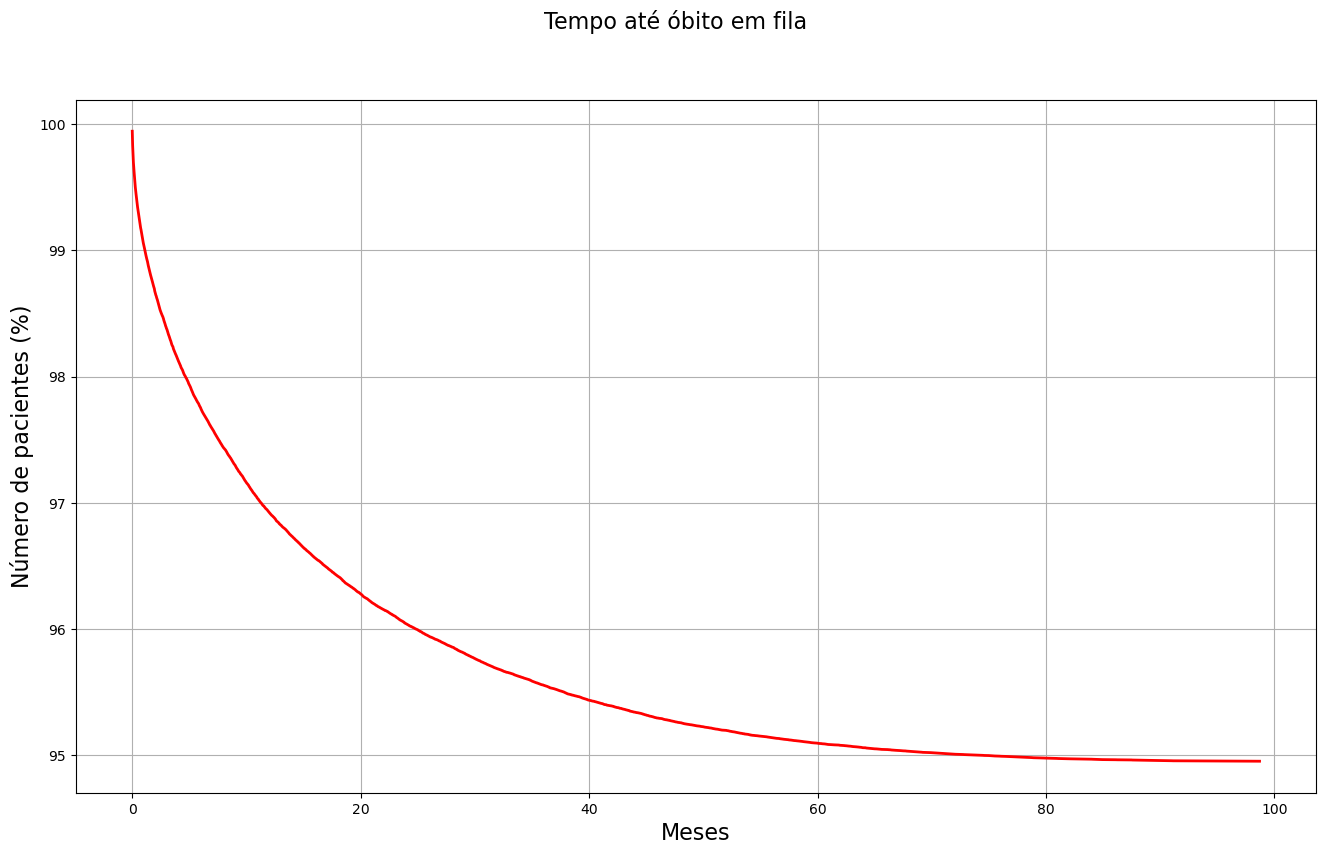

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Tempo até óbito em fila', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1,1)

ax.set_ylabel('Número de pacientes (%)', fontsize=16)
ax.set_xlabel('Meses', fontsize=16)

ax.plot(unique_delta, percentage, 'r', linewidth=2)

ax.grid()

plt.show()

## Tempo de seguimento

In [11]:
# Reading spread-sheet

header_row = 4

df_tranplantes = pd.read_excel(
    arquivo,
    sheet_name=2,
    header=header_row,
)
df_tranplantes.head()

,Ano do Transplante,Mês do Transplante,Enxerto,UF,Região,Data da Inscrição,Data do Transplante,Tipo de Doador,UF de Origem,ID,Data de Nascimento,Sexo,Grupo Sanguíneo,Cor,Equipe,Estabelecimento,Cidade Estabelecimento
0,2015,Janeiro,FI,CE,Nordeste,2014-12-04,2015-01-01,Doador Falecido,CE,123647CE,1983-02-06,F,A,Parda,CE - HUWC - José Huygens Parente Garcia,HOSPITAL UNIVERSITARIO WALTER CANTIDIO - HUWC,FORTALEZA
1,2015,Janeiro,FI,PE,Nordeste,2014-12-30,2015-01-01,Doador Falecido,PE,124865PE,1954-01-14,M,O,Parda,PE - HUOC - Cláudio Moura Lacerda,HOSPITAL UNIVERSITÁRIO OSWALDO CRUZ,RECIFE
2,2015,Janeiro,RI,PE,Nordeste,2014-09-26,2015-01-01,Doador Falecido,PE,118654PE,1999-05-18,F,A,Parda,PE - IMIP - Luis Gonzaga de Negreiros Filho,IMIP,RECIFE
3,2015,Janeiro,RI,RS,Sul,2013-05-02,2015-01-01,Doador Falecido,RS,85775RS,1949-03-01,F,B,Branca,RS - ISCMPA - Valter Duro Garcia,IRMANDADE SANTA CASA DE MISERICÓRDIA DE PORTO ...,PORTO ALEGRE
4,2015,Janeiro,RI,RS,Sul,2013-11-22,2015-01-01,Doador Falecido,RS,99196RS,1950-09-29,M,B,Branca,RS - AHCI - Maria Leocádia Amaral Padilha,ASSOCIAÇÃO HOSPITAL DE CARIDADE DE IJUÍ,IJUI


In [12]:
dfs = [df_inscricao,df_obitos,df_tranplantes]

In [13]:
from functools import reduce

final_df = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                            how='outer'), dfs)


In [14]:
final_df.head()

,UF_x,Região_x,ID,Ano_x,Mês_x,Data da Inscrição_x,Enxerto_x,Data de Nascimento_x,Sexo_x,Grupo Sanguíneo_x,...,Data do Transplante,Tipo de Doador,UF de Origem,Data de Nascimento,Sexo,Grupo Sanguíneo,Cor,Equipe,Estabelecimento,Cidade Estabelecimento
0,SP,Sudeste,188975SP,2015.0,Janeiro,2015-01-01,CO,1967-09-06,M,O,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,PE,Nordeste,124895PE,2015.0,Janeiro,2015-01-02,FI,1954-04-16,M,O,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,PB,Nordeste,124877PB,2015.0,Janeiro,2015-01-02,RI,1974-09-25,M,O,...,2017-01-29,Doador Falecido,PB,1974-09-25,M,O,Parda,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE
3,PB,Nordeste,124880PB,2015.0,Janeiro,2015-01-02,RI,1965-11-27,M,A,...,2016-12-09,Doador Falecido,PB,1965-11-27,M,A,Parda,PB - HAT - Amanda Maíra Damasceno Silva,HOSPITAL ANTONIO TARGINO,CAMPINA GRANDE
4,PB,Nordeste,124872PB,2015.0,Janeiro,2015-01-02,RI,1962-12-16,M,O,...,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
final_df.columns

Index(['UF_x', 'Região_x', 'ID', 'Ano_x', 'Mês_x', 'Data da Inscrição_x',
       'Enxerto_x', 'Data de Nascimento_x', 'Sexo_x', 'Grupo Sanguíneo_x',
       'Cor_x', 'UF origem', 'Equipe_x', ' Estabelecimento_x',
       'Cidade Estabelecimento_x', 'UF_y', 'Região_y', 'Data de Nascimento_y',
       'Sexo_y', 'Grupo Sanguíneo_y', 'Cor_y', 'Ano_y', 'Mês_y',
       'Data do Óbito', 'Enxerto_y', 'Equipe_y', ' Estabelecimento_y',
       'Cidade Estabelecimento_y', 'Evento', ' Ano do Transplante',
       ' Mês do Transplante', 'Enxerto', 'UF', 'Região', 'Data da Inscrição_y',
       'Data do Transplante', 'Tipo de Doador', 'UF de Origem',
       'Data de Nascimento', 'Sexo', 'Grupo Sanguíneo', 'Cor', 'Equipe',
       'Estabelecimento', 'Cidade Estabelecimento'],
      dtype='object')